In [1]:
import sys; sys.path.insert(0, '..')
from dot_plots import *
import Merge_Cartesian as MC

import ipywidgets as widgets
from IPython.display import display

from matplotlib.animation import FFMpegWriter
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Jonathan\\Documents\\Academic\\Masters\\Simulator\\Git\\Main_Algorithm\\ffmpeg\\bin\\ffmpeg.exe'

%matplotlib widget

In [2]:
TL= '12'
TC= '1'
layers = 10

(Numbers, 
Major_Grid_x, Major_Grid_y,
Minor_Grid_x, Minor_Grid_y,
Sending_Grid_x, Sending_Grid_y,
Recieivng_Grid_x, Recieivng_Grid_y,
Line_Grid_px, Line_Grid_py,
Letters) = calcualte_numbers_and_grids_and_lines(TL,TC,layers)
float_Numbers = [float(n) for n in Numbers]

In [3]:
ZL = '1000'
ZC = '1'

number_periods = 1

Inductor_List =    [ZL   ,TL  ,'1']
Capacitor_List =   [ZC   ,TC  ,'1']
Circuit_List =   ['1'      , number_periods, False, '12']
(data_input,
data_output,
data_output_merged, 
data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        6000
Inductor Capacitance Per Length :       0.006
Inductor Length :                       1
Inductor Total Inductance :             6000
Inductor Total Capacitance :            0.006
Inductor Velocity :                     0.1666666666666666666666666667
Inductor Time Delay :                   6
Inductor Impedance :                    1000

- The Capacitor -
Capacitor Inductance Per Length :       0.5
Capacitor Capacitance Per Length :      0.5
Capacitor Length :                      1
Capacitor Total Inductance :            0.5
Capacitor Total Capacitance :           0.5
Capacitor Velocity :                    2
Capacitor Time Delay :                  0.5
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  344.1442325727512361018057416
Number of Wavefronts :                  240124
Number of Layers :        

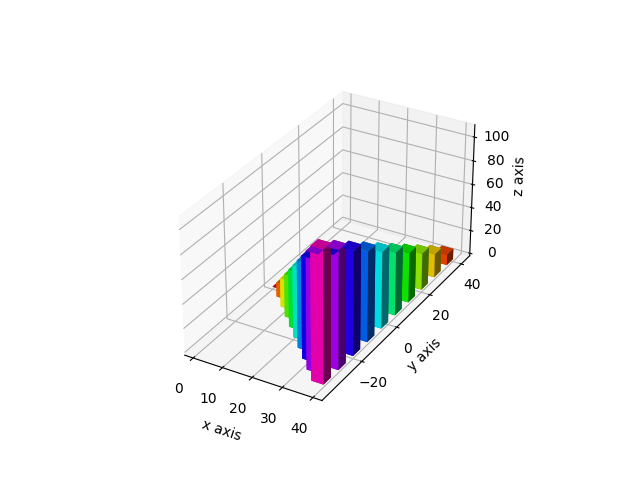

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = Major_Grid_x[:len(Numbers)]#[1,2,3,4,5,6,7,8,9,10]
y3 = Major_Grid_y[:len(Numbers)]#[5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(len(Numbers))

dx = np.ones(len(Numbers))*4
dy = np.ones(len(Numbers))*4
dz = float_Numbers

ax1.set_box_aspect((np.ptp([0,1]), np.ptp([0,2]), np.ptp([0,1])))

bar_val_min = 0
bar_val_max = max(Numbers)

cmap = cm.gist_rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=bar_val_max)
ax1.bar3d(x3, y3, z3, dx, dy, dz , color=cmap(norm(float_Numbers)))


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

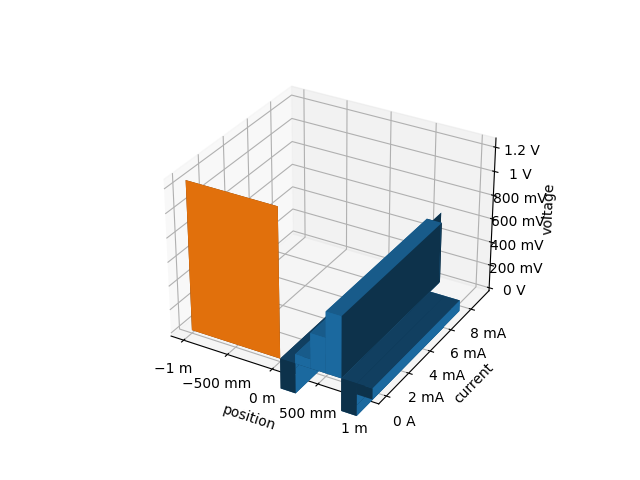

In [5]:
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(111, projection='3d')

MC.plot_3d_spatial(Decimal('100'),data_output_merged,data_output_ordered,ax_3d)

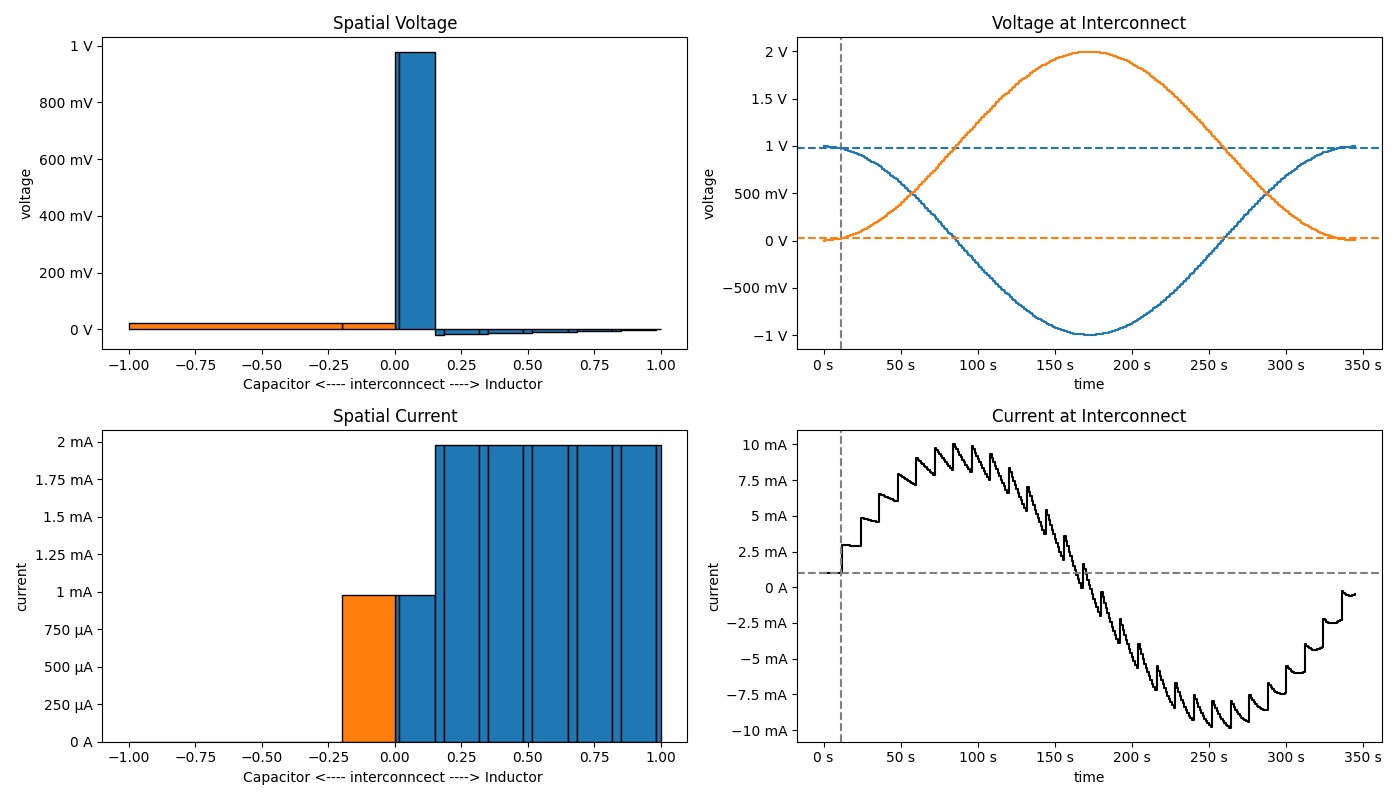

In [6]:
fig_2d, ax_2d = plt.subplots(2,2,figsize=(14, 8))

time = Decimal('11.1')

first_y_voltage_capacitor, first_y_voltage_inductor, first_y_current = MC.plot_spatial_same_axis(time,data_output_merged,data_output_ordered,ax_2d[0,0],ax_2d[1,0])
MC.plot_time_interconnect_and_intercept(time,data_output_ordered,ax_2d[0,1],ax_2d[1,1],first_y_voltage_capacitor, first_y_voltage_inductor, first_y_current)

fig_2d.tight_layout()

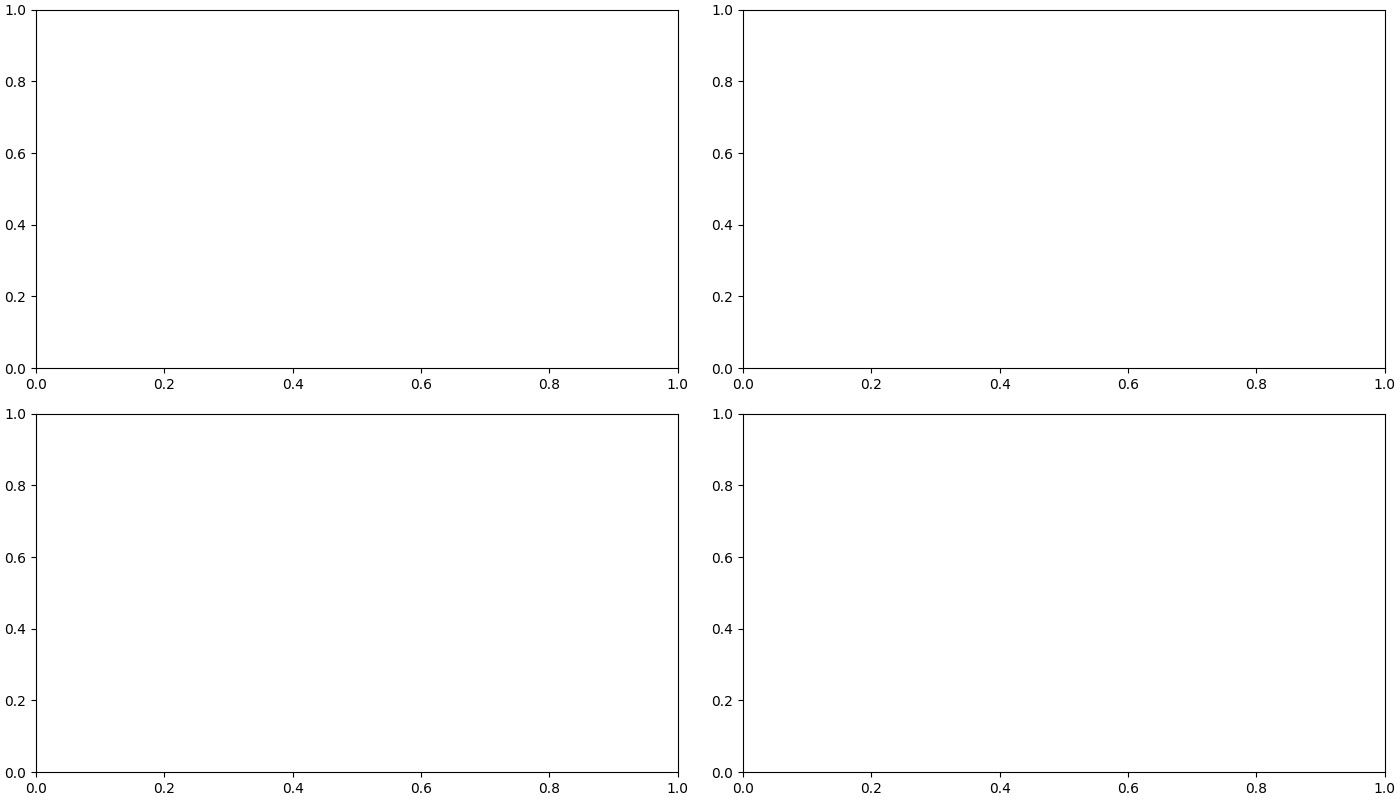

In [7]:
MC.save_spatial_interconnect(data_input,data_output_merged,data_output_ordered,start_time = Decimal('0'),video_runtime=Decimal('1'),save_name='test')


GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=343.14423257275126)

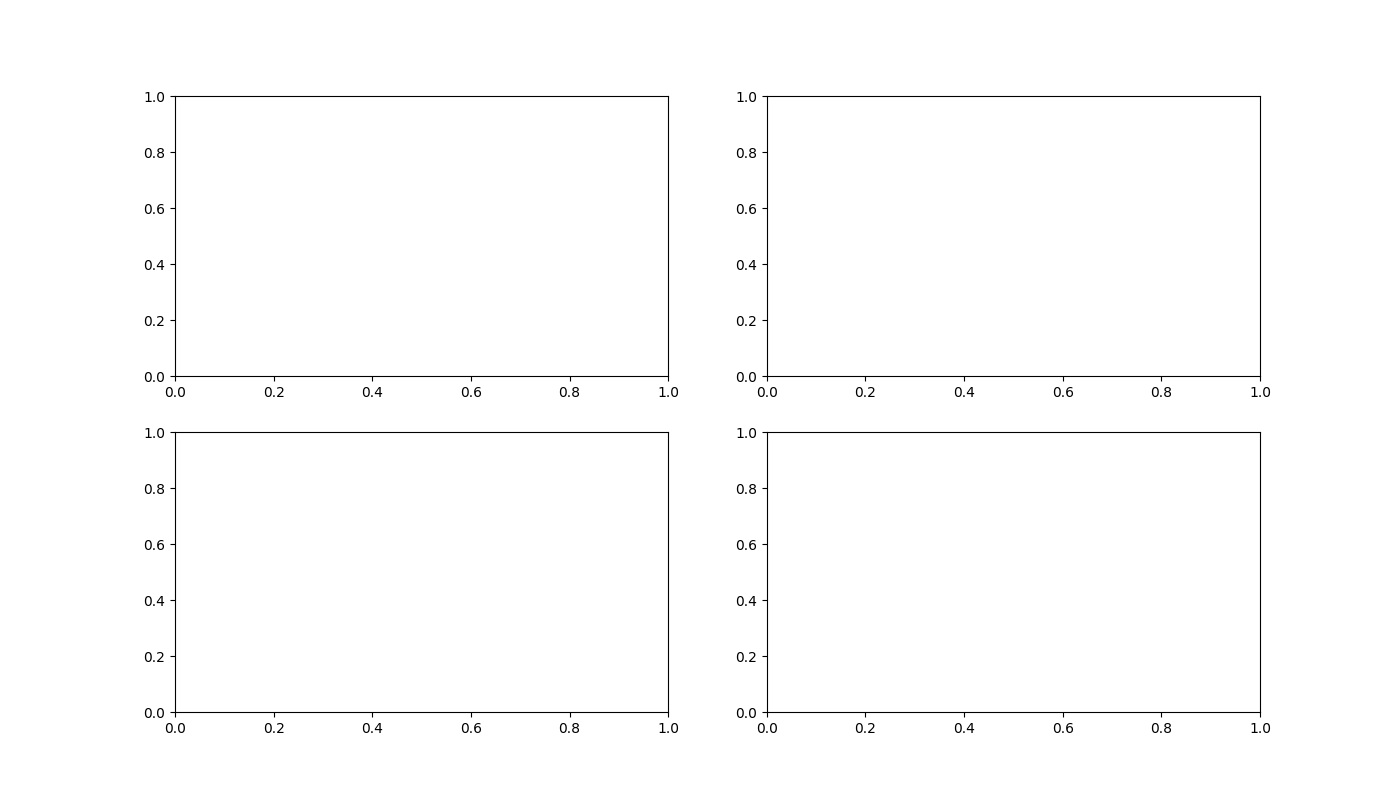

In [8]:
MC.spatial_interconnect_investigator_ui(data_input,data_output_merged,data_output_ordered)

In [9]:
# fig_save = plt.figure()
# ax_save = fig_save.add_subplot(111, projection='3d')

# ax_save.xaxis.set_major_formatter(matplotlib.ticker.EngFormatter('m'))
# ax_save.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter('A'))
# ax_save.zaxis.set_major_formatter(matplotlib.ticker.EngFormatter('v'))
                
# save_name= '3d_spatial'

# start_time = Decimal('0')
# end_time = Decimal('200')

# fps = Decimal('30')
# video_runtime = Decimal('60')
# dpi = 300


# number_frames =  video_runtime*fps
# time_increment = (end_time - start_time)/number_frames

# metadata = dict(title='Distributed Modelling', artist='Jonathan Meerholz')
# writer = FFMpegWriter(fps=float(fps), metadata=metadata)

# time = start_time
# frame_counter = 0
# with writer.saving(fig_save, (save_name+".mp4"), float(dpi)):
    
#     for _ in range(0,int(number_frames)):
#         ax_save.axes.set_xlim3d(left=-1, right=1) 
#         # ax_save.axes.set_ylim3d(bottom=-0.004, top=0.004) 
#         # ax_save.axes.set_zlim3d(bottom=-1, top=1) 
#         ax_save.view_init(20, 80)
        
#         plot_3d_spatial(time,data_output_merged,data_output_ordered,ax_save)
#         writer.grab_frame()
#         time += time_increment
#         frame_counter +=1
#         ax_save.clear()
        